# Computer vision: Foundations
Summer Semester 2020
Exercise Sheet 02 Downsampling


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
# To make sure that no interpolation is performed automatically by matplotlib
plt.rcParams["image.interpolation"] = None


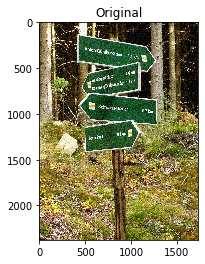

In [3]:
# Load the image in python and plot it at the original resolution
original = plt.imread(".\data\sign.jpg")
plt.imshow(original)
plt.title("Original")
plt.show()


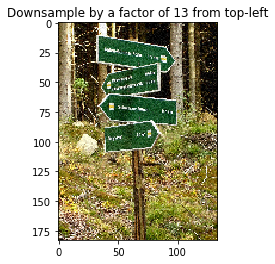

COMMENTS: Resolution of the image worsens considerably; texts on sign no longer recognizable.


In [6]:
# a) Downsample by a factor of 13 in both directions. Start from the pixel at the top-left corner of the original image.

subsample_00 = original[0::13,0::13,:]
plt.imshow(subsample_00)
plt.title("Downsample by a factor of 13 from top-left")
plt.show()
print("COMMENTS: Resolution of the image worsens considerably; texts on sign no longer recognizable.")


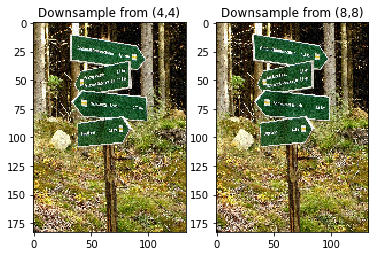

COMMENTS: Images are slightly shifted to the left. Difference in visible parts of the texts are also observed


In [5]:
# b) Shifting the image - start from the pixel with coordinates (4, 4) and (8, 8)

subsample_44 = original[4::13,4::13,:]
subsample_88 = original[8::13,8::13,:]
plt.subplot(1,2,1)
plt.imshow(subsample_44)
plt.title("Downsample from (4,4)")
plt.subplot(1,2,2)
plt.imshow(subsample_88)
plt.title("Downsample from (8,8)")
plt.show()
print("COMMENTS: Images are slightly shifted to the left. Difference in visible parts of the texts are also observed")


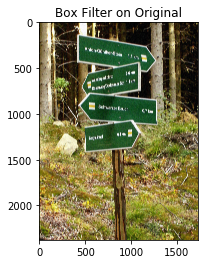

In [17]:
# c) Box filter - Write a function that returns the box kernel for a given dowscaling factor N and then apply the filter to the image sign.jpg for N = 13
# Hint: use “valid” convolutions to avoid boundary artifacts; use the function scipy.ndimage.convolve and the fact that the kernel is separable.

def box_filter_1D(N):
	kernel = np.ones([N])
	return kernel/kernel.sum()

kernel_box = box_filter_1D(13)
img_boxfilter = np.zeros(original.shape)
for i in range(original.shape[2]):
	img_boxfilter[:,:,i] = scipy.ndimage.convolve1d(original[:,:,i],kernel_box,axis=0)
	img_boxfilter[:,:,i] = scipy.ndimage.convolve1d(img_boxfilter[:,:,i],kernel_box,axis=0)
	max = img_boxfilter[:,:,i].max()
	min = img_boxfilter[:,:,i].min()
	img_boxfilter[:, :, i] = (img_boxfilter[:,:,i] - min) / (max-min)
plt.imshow(img_boxfilter)
plt.title("Box Filter on Original")
plt.show()

#TODO: Is there a smarter way to do this, rather than looping over all channels manually?


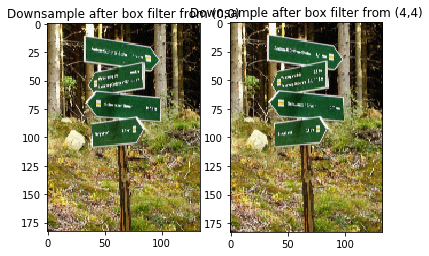

Q: How does the output change if you start subsampling from the pixel with coordinates (4, 4) in the filtered image? 
COMMENTS: Not much change... what is the intended effect here?


In [16]:
# d) Downsampling with Box filter
subsample_00_box = img_boxfilter[0::13,0::13,:]
plt.subplot(1,2,1)
plt.imshow(subsample_00_box)
plt.title("Downsample after box filter from (0,0)")

subsample_44_box = img_boxfilter[4::13,4::13,:]
plt.subplot(1,2,2)
plt.imshow(subsample_44_box)
plt.title("Downsample after box filter from (4,4)")
plt.show()
print("Q: How does the output change if you start subsampling from the pixel with coordinates (4, 4) in the filtered image? \nCOMMENTS: Not much change... what is the intended effect here?")



In [15]:
# e) Computational Efficiency

print("Q: When we apply the filter and then subsample the image, we are wasting some computations. Why? \nCOMMENTS: We are computing over all pixels for the filtering but only taking a subset of that for the downsampling, hence not computationally efficient.\n ")

print("Q: Which argument of the conv1d function would you use to avoid the waste of computations? \nCOMMENTS: Could make stride size = downsamplying factor and only compute for the signal at the center which will be sampled. \n")


Q: When we apply the filter and then subsample the image, we are wasting some computations. Why? 
COMMENTS: We are computing over all pixels for the filtering but only taking a subset of that for the downsampling, hence not computationally efficient.
 
Q: Which argument of the conv1d function would you use to avoid the waste of computations? 
COMMENTS: Could make stride size = downsamplying factor and only compute for the signal at the center which will be sampled. 



Lanczos kernel for N = 9 and α = 2 
 [ 0.00000000e+00 -3.71164225e-04 -1.55103377e-03 -3.47584304e-03
 -5.83317388e-03 -8.06233351e-03 -9.40677616e-03 -9.01591858e-03
 -6.08338331e-03  2.73066153e-18  9.50528642e-03  2.22637990e-02
  3.76271046e-02  5.45013745e-02  7.14563801e-02  8.68960759e-02
  9.92661615e-02  1.07266461e-01  1.10033967e-01  1.07266461e-01
  9.92661615e-02  8.68960759e-02  7.14563801e-02  5.45013745e-02
  3.76271046e-02  2.22637990e-02  9.50528642e-03  2.73066153e-18
 -6.08338331e-03 -9.01591858e-03 -9.40677616e-03 -8.06233351e-03
 -5.83317388e-03 -3.47584304e-03 -1.55103377e-03 -3.71164225e-04
  0.00000000e+00]


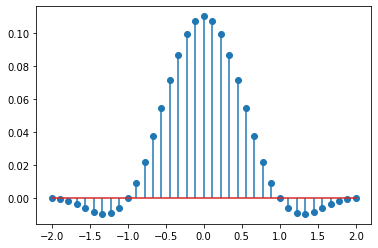

In [21]:
# f) Lanczos filter - Write a function computing the normalized Lanczos kernel for a given downscaling factor N and a parameter α.

import math
def Lanczos_filter(N,alpha):
	inputs = np.linspace(0,alpha,num=N*alpha+1,endpoint=True)[1:-1]
	rhs = []
	for x in inputs:
		rhs.append(math.sin(math.pi * x) / (math.pi * x) * math.sin(math.pi * x / alpha) / (math.pi * x / alpha))
	rhs.append(0)
	rhs = np.array(rhs)
	lhs = np.flip(rhs)
	kernel = np.concatenate((lhs,np.array([1.]),rhs))
	return kernel/kernel.sum()

print("Lanczos kernel for N = 9 and α = 2 \n", Lanczos_filter(N=9, alpha=2))

plt.stem(np.linspace(-2,2,num=37,endpoint=True),Lanczos_filter(N=9, alpha=2),use_line_collection=True)
plt.show()



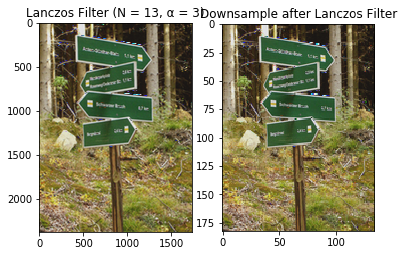

COMMENTS: Better image quality, smooth/less edgy


In [22]:
# g) Apply the Lanczos filter to the image sign.jpg for N = 13 and α = 3 and then subsample the image. Plot and comment your results

kernel_lanczos = Lanczos_filter(N=13, alpha=3)
img_ = np.zeros(original.shape)
for i in range(original.shape[2]):
	img_[:,:,i] = scipy.ndimage.convolve1d(original[:,:,i],kernel_lanczos,axis=0)
	img_[:,:,i] = scipy.ndimage.convolve1d(img_[:,:,i],kernel_lanczos,axis=1)
	max = img_[:,:,i].max()
	min = img_[:,:,i].min()
	img_[:, :, i] = (img_[:,:,i] - min) / (max-min)
subsample_lanczos = img_[0::13,0::13,:]

plt.subplot(1,2,1)
plt.imshow(img_)
plt.title("Lanczos Filter (N = 13, α = 3)")

plt.subplot(1,2,2)
plt.imshow(subsample_lanczos)
plt.title("Downsample after Lanczos Filter")

plt.show()
print("COMMENTS: Better image quality, smooth/less edgy")


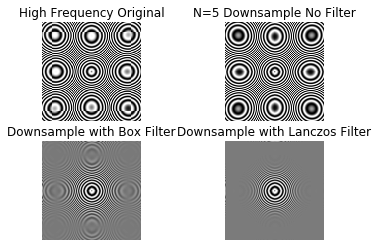

COMMENTS: Downsampling without filter has the worst image quality due to aliasing. Least artifacts with Lanczos filter


In [31]:
# h)  High-frequency image
hf_img = plt.imread(".\data\high-frequency.png")
hf_img.shape #(500, 500)

plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(hf_img,cmap='gray')
plt.title("High Frequency Original")

N = 5
hf_downsample_nofilter = hf_img[::N,::N]

plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(hf_downsample_nofilter,cmap='gray')
plt.title("N=5 Downsample No Filter")

filters = [box_filter_1D(N),Lanczos_filter(N,alpha=2)]
filterNames = ["Box Filter", "Lanczos Filter"]
n = len(filters)
for j in range(n):
	filter = filters[j]
	img_ = np.zeros(hf_img.shape)
	img_ = scipy.ndimage.convolve1d(hf_img, filter, axis=0)
	img_ = scipy.ndimage.convolve1d(img_, filter, axis=1)
	max = img_.max()
	min = img_.min()
	img_ = (img_ - min) / (max-min)
	subsample = img_[::N,::N]
	plt.subplot(2,2,j+3)
	plt.axis('off')
	plt.imshow(subsample,cmap='gray')
	plt.title("Downsample with "+filterNames[j])
plt.savefig("high_frequency_downsampling_outputs")
plt.show()

print("COMMENTS: Downsampling without filter has the worst image quality due to aliasing. Least artifacts with Lanczos filter")
